In [6]:
data = pd.read_csv("ohe_customer_dataset.csv", sep=",")

In [7]:
import pandas as pd

In [8]:
data

,transactionFailed,fraudulent,"orderAmount_(9.999, 18.4]","orderAmount_(18.4, 30.0]","orderAmount_(30.0, 39.0]","orderAmount_(39.0, 47.0]","orderAmount_(47.0, 353.0]",orderAmount_desconocido,orderState_failed,orderState_fulfilled,...,emailProvider_gmail,emailProvider_hotmail,emailProvider_other,emailProvider_weird,emailProvider_yahoo,customerIPAddressSimplified_digits_and_letters,customerIPAddressSimplified_only_letters,sameCity_no,sameCity_unknown,sameCity_yes
0,False,0,True,False,False,False,False,False,False,False,...,False,False,False,False,True,False,True,False,False,True
1,False,1,False,True,False,False,False,False,False,True,...,False,False,False,False,True,False,True,True,False,False
2,False,0,False,False,False,True,False,False,False,True,...,False,False,False,False,True,True,False,True,False,False
3,False,0,False,True,False,False,False,False,False,True,...,False,False,False,False,True,True,False,True,False,False
4,True,1,False,False,False,True,False,False,False,True,...,False,False,True,False,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
618,True,2,False,False,False,False,False,True,False,False,...,False,False,False,True,False,False,True,False,True,False
619,True,2,False,False,False,False,False,True,False,False,...,False,False,False,True,False,False,True,False,True,False
620,False,2,False,False,False,False,False,True,False,False,...,False,False,False,True,False,False,True,False,True,False
621,False,2,False,False,False,False,False,True,False,False,...,False,False,False,True,False,False,True,False,True,False


In [9]:
filter_data = data[["orderState_failed", "orderState_fulfilled", "orderState_pending", "transactionFailed", "fraudulent", "customerIPAddressSimplified_digits_and_letters"]].copy()

In [10]:
from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters=3, random_state=0)

kmeans.fit(filter_data)


c:\Users\fedev\OneDrive\Escritorio\twting\env\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=0)

In [11]:
cluster_assignments = kmeans.labels_

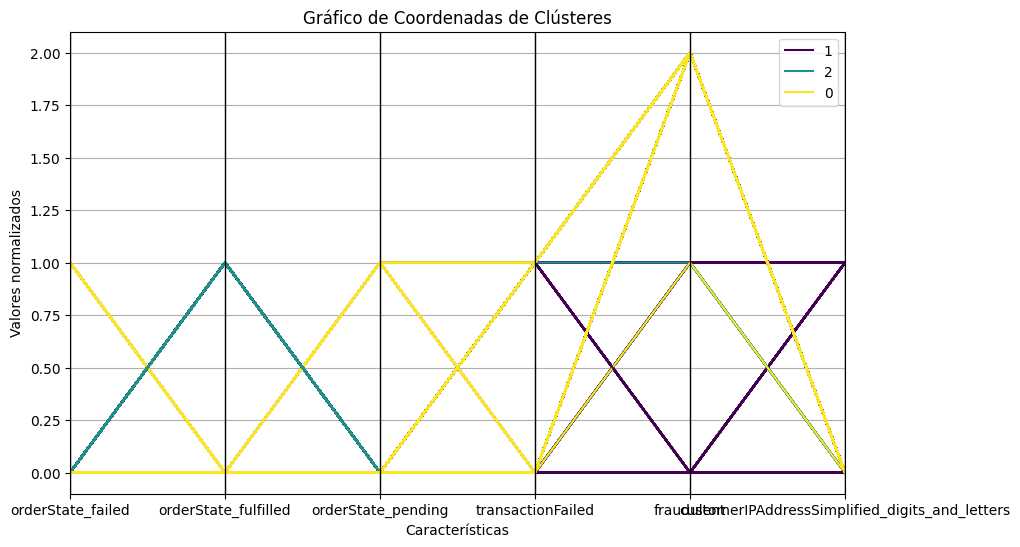

In [12]:
# Crear un DataFrame con los resultados del modelo y los datos originales
results = pd.DataFrame(filter_data, columns=filter_data.columns)
results['Cluster'] = cluster_assignments

# Graficar el Gráfico de Coordenadas
from pandas.plotting import parallel_coordinates
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
parallel_coordinates(results, 'Cluster', colormap='viridis')
plt.title('Gráfico de Coordenadas de Clústeres')
plt.xlabel('Características')
plt.ylabel('Valores normalizados')
plt.show()


In [13]:
from sklearn.cluster import KMeans

cl_model = KMeans(
    n_clusters=3,     # el parámetro importante!
    init='k-means++', # k-means++ acelera la convergencia, respecto de random
    max_iter=100,
    random_state=0,
    n_init='auto'     # Para evitar warnings más adelante
)

cl_model.fit(filter_data)

KMeans(max_iter=100, n_clusters=3, n_init='auto', random_state=0)

In [14]:
pred_cl = cl_model.predict(filter_data)

# Número de cluster:
pred_cl

array([1, 0, 1, 1, 2, 0, 2, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 1, 0, 1, 0, 2, 1, 1,
       2, 1, 1, 1, 1, 0, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 2, 2, 2,
       0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2,

In [15]:
cluster_var='cluster' # definan nombre de var de clusteringa
x_data_cl=filter_data.copy() # hagan copia de los datos de TR para no perderlos antes de normalizar
x_data_cl[cluster_var]=cl_model.predict(filter_data) # ojo aca! el predict es de los datos normalizados

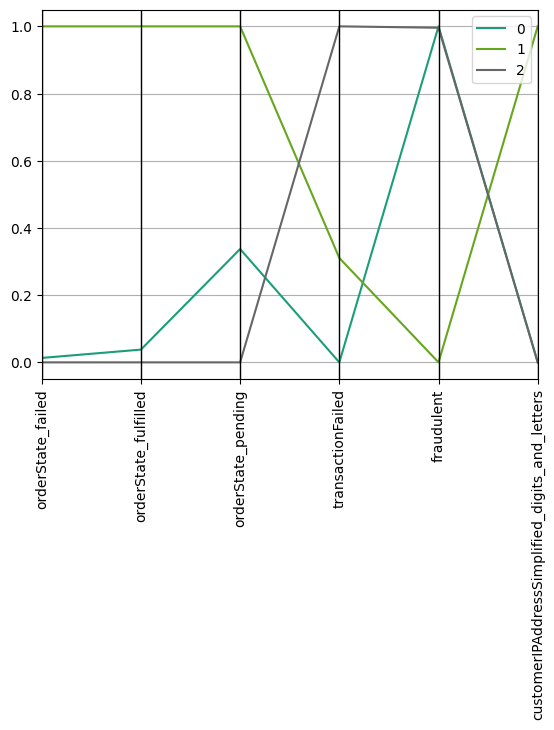

In [16]:
from funpymodeling.model_validation import coord_plot
d_orig, d_transf = coord_plot(x_data_cl, cluster_var)

In [17]:
d_orig

,orderState_failed,orderState_fulfilled,orderState_pending,transactionFailed,fraudulent,customerIPAddressSimplified_digits_and_letters,cluster
0,0.071429,0.598901,0.041209,0.000000,1.928571,0.000000,0
1,0.113636,0.810606,0.075758,0.310606,0.189394,0.583333,1
2,0.070866,0.590551,0.023622,1.000000,1.921260,0.000000,2


In [18]:
d_transf

,orderState_failed,orderState_fulfilled,orderState_pending,transactionFailed,fraudulent,customerIPAddressSimplified_digits_and_letters,cluster
0,0.01315,0.037945,0.337327,0.000000,1.000000,0.0,0
1,1.00000,1.000000,1.000000,0.310606,0.000000,1.0,1
2,0.00000,0.000000,0.000000,1.000000,0.995796,0.0,2


Los dos insights que me llamaron la atención fueron que mayoritariamente los fraudulent, tienen transiciones fallidas y órdenes pendientes, podía ser un gran señal para tomar medidas a futuro del cliente para poner una barrera sobre cierta cantidad de transacciones fallidas y un limite de pendientes.

In [19]:
!pip3 install plotly


In [20]:
import plotly.express

In [29]:
# Selección de vars
d2=data[['orderState_failed', 'customerIPAddressSimplified_digits_and_letters','transactionFailed','fraudulent']]

# Tomamos muestra para que no nos explote el gráfico ;)
d2=d2.sample(n=300)

In [30]:
# Usamos la maravilla de plotly
import plotly.express as px

fig = px.scatter_3d(d2, x='orderState_failed', y='customerIPAddressSimplified_digits_and_letters', z='transactionFailed', color='fraudulent')
fig.show()

In [ ]:
import hdbscan

ModuleNotFoundError: No module named 'hdbscan'

In [ ]:
status(x_data)

In [ ]:
model_hdb = hdbscan.HDBSCAN()
model_hdb.fit(x_data)

In [ ]:
model_hdb.labels_

In [ ]:
from funpymodeling.exploratory import freq_tbl, todf

freq_tbl(model_hdb.labels_.astype('str'))

In [ ]:
model_hdb2 = hdbscan.HDBSCAN(min_cluster_size=15).fit(x_data)

In [ ]:
freq_tbl(model_hdb2.labels_.astype('str'))

In [ ]:
cluster_var='cluster' 
x_data_cl=x_data.copy() 
x_data_cl[cluster_var]=model_hdb2.labels_ 

In [ ]:
x_data_cl.head()

In [ ]:
x_data_cl=x_data_cl[x_data_cl['cluster']!=-1]

In [ ]:
from funpymodeling.model_validation import coord_plot
d_orig, d_transf = coord_plot(x_data_cl, cluster_var)